In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=pd.read_csv('cardekho_dataset cln.csv')
data.isnull().sum()


car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

name_encode=LabelEncoder()
brand_encode=LabelEncoder()
model_encode=LabelEncoder()
seller_encode=LabelEncoder()
fuel_encode=LabelEncoder()
transmission_encode=LabelEncoder()
data['car_name']=name_encode.fit_transform(data.car_name)
data['brand']=brand_encode.fit_transform(data.brand)
data['model']=model_encode.fit_transform(data.model)
data['seller_type']=seller_encode.fit_transform(data.seller_type)
data['fuel_type']=fuel_encode.fit_transform(data.fuel_type)
data['transmission_type']=transmission_encode.fit_transform(data.transmission_type)

In [4]:
x=data.drop('selling_price',axis=1)
y=data['selling_price']

# splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [5]:
# basic models - linear models - linear regression, lasso, ridge

# Linear models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

# Ridge - Overfitting - multicolinearity
ridge=Ridge(random_state=40)
rm=ridge.fit(x_train,y_train)
y_pred_rm=rm.predict(x_test)
rm_score=r2_score(y_test,y_pred_rm)
print('ridge model accuracy-',rm_score)

# Boosting technique

from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

#Adaboost
ab=AdaBoostRegressor(learning_rate=0.2,random_state=30)
ab_model=ab.fit(x_train,y_train)
y_pred_ab=ab_model.predict(x_test)
ab_score=r2_score(y_test,y_pred_ab)
print('ada boost model accuracy-',ab_score)

#Gradiantboost
gb=GradientBoostingRegressor()
gb_model=gb.fit(x_train,y_train)
y_pred_gb=gb_model.predict(x_test)
gb_score=r2_score(y_test,y_pred_gb)
print('gradient boost model-',gb_score)

ridge model accuracy- 0.6845255692913661
ada boost model accuracy- 0.6417051356851291
gradient boost model- 0.7150251186152252


random forest accuracy- 0.8768629150098549
    estimator  accuracy
0           1  0.866995
1           2  0.866525
2           3  0.910041
3           4  0.876863
4           5  0.902222
5           6  0.911474
6           7  0.919307
7           8  0.921775
8           9  0.925848
9          10  0.927074
10         11  0.931417
11         12  0.929679
12         13  0.929495
13         14  0.924409
14         15  0.920470
15         16  0.922005
16         17  0.919629
17         18  0.924389
18         19  0.921755
19         20  0.919507
20         21  0.912148
21         22  0.915608
22         23  0.909435
23         24  0.911454
24         25  0.909374
25         26  0.902721
26         27  0.905552
27         28  0.898929
28         29  0.892447
29         30  0.885592
30         31  0.889611
31         32  0.892701
32         33  0.895040
33         34  0.892886
34         35  0.891606
35         36  0.885218
36         37  0.888182
37         38  0.886613
38         39  0.8890

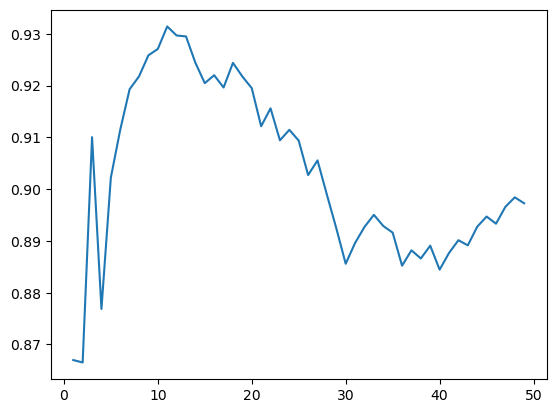

In [6]:
# Ensemble technique - random forest

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=4,random_state=20)
rf_model=rf.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
rf_score=r2_score(y_test,y_pred_rf)
print('random forest accuracy-',rf_score)


rf_acc_score={'estimator':[],'accuracy':[]}

for x in range(1,50):
    rf=RandomForestRegressor(n_estimators=x,random_state=20)
    rf_model=rf.fit(x_train,y_train)
    rf_y_pred=rf_model.predict(x_test)
    score=r2_score(y_test,rf_y_pred)
    rf_acc_score['estimator'].append(x)
    rf_acc_score['accuracy'].append(score)
import pandas as pd
rf_data=pd.DataFrame(rf_acc_score)
print(rf_data)
plt.plot(rf_data['estimator'],rf_data['accuracy'])

gradient boost model- 0.7405617054468001
   learning     score
0      0.05  0.703960
1      0.10  0.684851
2      0.20  0.722456
3      0.50  0.702603
4      0.60  0.630835
5      0.70  0.560603
6      0.90  0.360009
7      1.00  0.398642


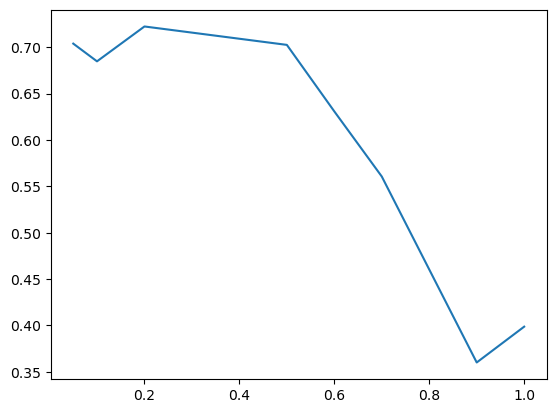

In [7]:
# Boosting technique

#Gradiantboost
gb=GradientBoostingRegressor()
gb_model=gb.fit(x_train,y_train)
y_pred_gb=gb_model.predict(x_test)
gb_score=r2_score(y_test,y_pred_gb)
print('gradient boost model-',gb_score)


gb_score={'learning':[],'score':[]}

learning_r=[0.05,0.1,0.2,0.5,0.6,0.7,0.9,1]
for x in learning_r:
    gb=GradientBoostingRegressor(learning_rate=x,random_state=40)
    gb_model=gb.fit(x_train,y_train)
    y_pred_gb=gb_model.predict(x_test)
    gb_acc_score=r2_score(y_test,y_pred_gb)
    gb_score['learning'].append(x)
    gb_score['score'].append(gb_acc_score)
gb_data=pd.DataFrame(gb_score)
print(gb_data)
plt.plot(gb_data['learning'],gb_data['score'])
plt.show()

XG boost model- 0.8332988362115114
   learning     score
0      0.05  0.830539
1      0.10  0.817293
2      0.20  0.811927
3      0.50  0.859815
4      0.60  0.878597
5      0.70  0.881840
6      0.90  0.888732
7      1.00  0.890953


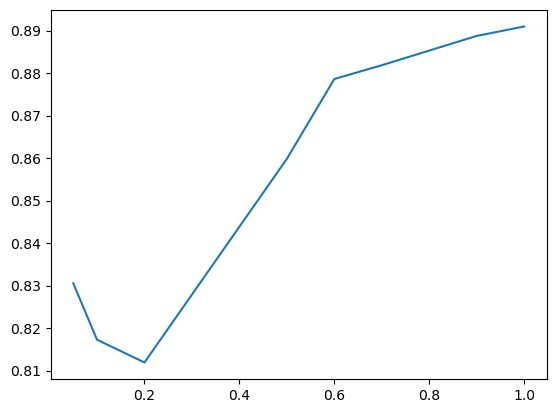

In [8]:
#XGBoost
xgb=XGBRegressor()
xgb_model=xgb.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)
xgb_score=r2_score(y_test,y_pred_xgb)
print('XG boost model-',xgb_score)


xgb_score={'learning':[],'score':[]}

learning_r=[0.05,0.1,0.2,0.5,0.6,0.7,0.9,1]
for x in learning_r:
    xgb=XGBRegressor(learning_rate=x,random_state=40)
    xgb_model=xgb.fit(x_train,y_train)
    y_pred_xgb=xgb_model.predict(x_test)
    xgb_acc_score=r2_score(y_test,y_pred_xgb)
    xgb_score['learning'].append(x)
    xgb_score['score'].append(xgb_acc_score)
xgb_data=pd.DataFrame(xgb_score)
print(xgb_data)
plt.plot(xgb_data['learning'],xgb_data['score'])
plt.show()

KNN Model accuracy- 0.8468550672594994
    neighbour     score
0           1  0.871350
1           2  0.766585
2           3  0.767023
3           4  0.827672
4           5  0.846855
5           6  0.863317
6           7  0.866886
7           8  0.862214
8           9  0.859965
9          10  0.853451
10         11  0.849102
11         12  0.843299
12         13  0.839168
13         14  0.834984
14         15  0.830569
15         16  0.826106
16         17  0.821744
17         18  0.819244
18         19  0.820564
19         20  0.815985
20         21  0.813099
21         22  0.811155
22         23  0.810940
23         24  0.808788
24         25  0.806037
25         26  0.804634
26         27  0.800701
27         28  0.796742
28         29  0.793859
29         30  0.791934
30         31  0.790333
31         32  0.788220
32         33  0.785707
33         34  0.783983
34         35  0.786665
35         36  0.785119
36         37  0.782709
37         38  0.781208
38         39  0.781238
3

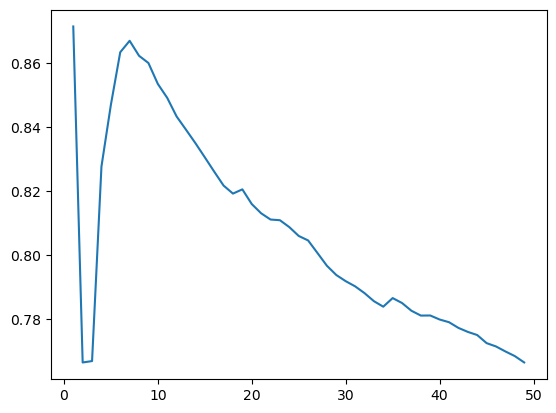

In [9]:
# KNN- K nearest Neighbours

from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn_model=knn.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)
knn_score=r2_score(y_test,y_pred_knn)
print('KNN Model accuracy-',knn_score)


knn_score={'neighbour':[],'score':[]}

for x in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=x)
    knn_model=knn.fit(x_train,y_train)
    y_pred_knn=knn_model.predict(x_test)
    knn_acc_score=r2_score(y_test,y_pred_knn)
    knn_score['neighbour'].append(x)
    knn_score['score'].append(knn_acc_score)
knn_data=pd.DataFrame(knn_score)
print(knn_data)
plt.plot(knn_data['neighbour'],knn_data['score'])
plt.show()